In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
CATEGORIES = ['bharatanatyam','kathak','kuchipudi','kathakali','odissi','manipuri','sattriya','mohiniyattam']

In [ ]:
training_data = []
IMG_SIZE = 224

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))[:,:,::-1]
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                print(e)

create_training_data()             

In [ ]:
import random
random.shuffle(training_data)

In [ ]:
for features,label in training_data:
    X.append(features)
    y.append(label)

In [12]:
import os
import cv2
import matplotlib.pyplot as plt

Sample Images

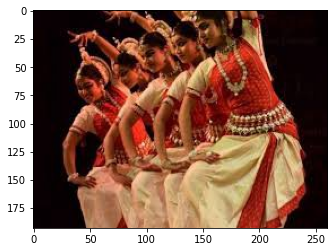

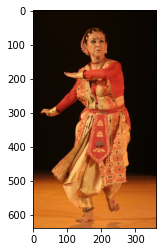

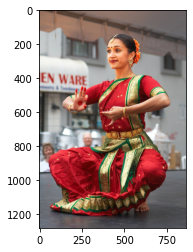

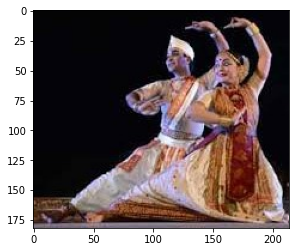

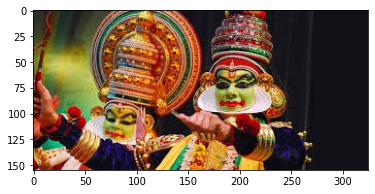

In [16]:
sample_image_path = "/content/drive/My Drive/pickle_files/dance_test_images/"
i = 0
for img in os.listdir(sample_image_path):
  path = sample_image_path + img
  img_array = cv2.imread(path)[:,:,::-1]
  plt.imshow(img_array)
  plt.show()
  i += 1
  if i == 5:
    break

In [ ]:
import pickle
pickle_out = open("A_224.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("b_224.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [3]:
import pickle

X = pickle.load(open("/content/drive/My Drive/pickle_files/A_224.pickle","rb"))
y = pickle.load(open("/content/drive/My Drive/pickle_files/b_224.pickle","rb"))

In [4]:
print(X.shape)
print(len(y))

(364, 224, 224, 3)
364


In [5]:
import numpy as np

In [6]:
y = np.array(y)

In [7]:
y

array([4, 1, 3, 7, 4, 0, 0, 6, 3, 0, 1, 2, 7, 6, 3, 6, 7, 7, 1, 3, 3, 0,
       6, 3, 1, 6, 4, 4, 5, 4, 7, 0, 5, 6, 4, 5, 0, 6, 3, 5, 4, 0, 4, 4,
       1, 0, 1, 6, 5, 0, 6, 7, 7, 1, 5, 0, 0, 1, 7, 0, 2, 0, 7, 6, 0, 1,
       0, 1, 4, 7, 7, 2, 4, 1, 7, 5, 7, 0, 2, 3, 5, 7, 0, 7, 7, 1, 6, 2,
       1, 0, 0, 0, 2, 7, 1, 2, 6, 3, 2, 0, 5, 0, 1, 1, 3, 5, 0, 5, 2, 0,
       5, 3, 4, 4, 6, 7, 2, 4, 1, 5, 6, 4, 4, 1, 7, 2, 1, 6, 5, 1, 2, 5,
       2, 4, 3, 6, 7, 2, 0, 4, 2, 0, 5, 3, 4, 2, 7, 6, 7, 3, 2, 3, 3, 0,
       1, 0, 6, 4, 2, 4, 0, 6, 2, 5, 4, 1, 5, 2, 4, 2, 5, 4, 4, 4, 3, 7,
       4, 3, 5, 4, 4, 5, 6, 6, 4, 0, 3, 3, 3, 7, 7, 6, 2, 0, 6, 3, 4, 2,
       2, 7, 6, 6, 3, 6, 6, 2, 7, 5, 2, 3, 7, 2, 1, 3, 3, 5, 4, 3, 1, 4,
       2, 5, 6, 0, 4, 0, 6, 2, 3, 3, 7, 2, 1, 7, 4, 7, 0, 6, 2, 5, 4, 4,
       7, 1, 1, 5, 6, 6, 1, 0, 6, 2, 7, 6, 0, 1, 3, 1, 2, 2, 7, 5, 5, 7,
       2, 0, 4, 2, 3, 0, 7, 5, 0, 5, 3, 1, 0, 3, 7, 2, 7, 3, 0, 4, 3, 3,
       4, 4, 0, 6, 1, 3, 0, 5, 2, 2, 4, 6, 2, 6, 1,

In [ ]:
import keras

Using TensorFlow backend.


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
IMG_SIZE = 224

In [ ]:
base_model = VGG19(input_shape = [IMG_SIZE, IMG_SIZE, 3], weights = "imagenet", include_top = False)

In [ ]:
for layers in base_model.layers:
  layers.trainable = False

In [ ]:
no_of_categories = 8

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
# adding a fully-connected layer
x = Dense(1024, activation='relu')(x)

prediction = Dense(8,activation="softmax")(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [ ]:
r = model.fit(X, y, batch_size=20, epochs=10, validation_split=0.2)

Train on 291 samples, validate on 73 samples
Epoch 1/10
291/291 [==============================] - 7s 26ms/step - loss: 6.1141 - accuracy: 0.2337 - val_loss: 2.3730 - val_accuracy: 0.4247
Epoch 2/10
291/291 [==============================] - 3s 11ms/step - loss: 0.7600 - accuracy: 0.7766 - val_loss: 1.7587 - val_accuracy: 0.6164
Epoch 3/10
291/291 [==============================] - 3s 11ms/step - loss: 0.3081 - accuracy: 0.8935 - val_loss: 1.4416 - val_accuracy: 0.6164
Epoch 4/10
291/291 [==============================] - 3s 10ms/step - loss: 0.0644 - accuracy: 0.9863 - val_loss: 1.3105 - val_accuracy: 0.6849
Epoch 5/10
291/291 [==============================] - 3s 10ms/step - loss: 0.0278 - accuracy: 0.9931 - val_loss: 1.5777 - val_accuracy: 0.6438
Epoch 6/10
291/291 [==============================] - 3s 11ms/step - loss: 0.0213 - accuracy: 0.9897 - val_loss: 1.3905 - val_accuracy: 0.6849
Epoch 7/10
291/291 [==============================] - 3s 11ms/step - loss: 0.0108 - accuracy: 1.0

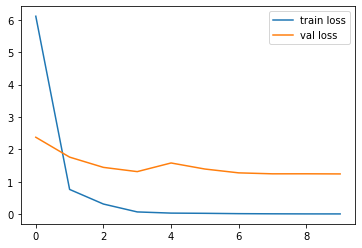

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

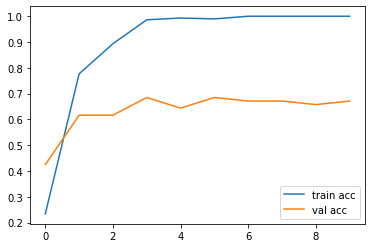

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
# plt.savefig('AccVal_acc')

In [ ]:
def prepare(filepath):
    IMG_SIZE = 224
    img_array = cv2.imread(filepath)[:,:,::-1]
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,3)

test_img_path = "/content/drive/My Drive/pickle_files/dance_test_images/"

Image = []
target = []

import os
import cv2

for img in os.listdir(test_img_path):
  path = test_img_path + img
  print(path)
  pred = model.predict([prepare(path)])
  pred_list = pred[0].tolist()
  print(pred_list)
  print("Class of image : ",CATEGORIES[pred_list.index(max(pred_list))])
  Image.append(img)
  target.append(CATEGORIES[pred_list.index(max(pred_list))])
  print("---------------------------------------\n")


for i in range(156):
  print(Image[i], " --> ", target[i])


d = {'Image' : Image, 'target' : target}
df = pd.DataFrame(d)
print(df.target.value_counts())
df.to_csv("dance_vgg19.csv")

/content/drive/My Drive/pickle_files/dance_test_images/460.jpg
[1.0459977602295112e-05, 3.8837377360323444e-05, 9.693970923763118e-07, 2.1780038878205232e-05, 0.9926215410232544, 0.004521493334323168, 0.0003485713677946478, 0.0024363647680729628]
Class of image :  odissi
---------------------------------------

/content/drive/My Drive/pickle_files/dance_test_images/358.jpg
[2.6567346139927395e-05, 0.00032456248300150037, 0.00016571323794778436, 1.739225152785906e-10, 0.00015940560842864215, 2.3568641154270153e-06, 0.9993183612823486, 2.9804211862938246e-06]
Class of image :  sattriya
---------------------------------------

/content/drive/My Drive/pickle_files/dance_test_images/145.jpg
[0.9999918937683105, 5.601474413197138e-07, 3.521209464452113e-06, 1.3470520343616954e-06, 1.4377897059603129e-06, 8.501676234118349e-07, 2.4567697209931794e-07, 1.2786874492576317e-07]
Class of image :  bharatanatyam
---------------------------------------

/content/drive/My Drive/pickle_files/dance_tes

In [ ]:
print(df.target.value_counts())

odissi           35
kuchipudi        22
sattriya         20
kathakali        20
bharatanatyam    18
mohiniyattam     17
kathak           17
manipuri          7
Name: target, dtype: int64


In [ ]:
df

,Image,target
0,460.jpg,odissi
1,358.jpg,sattriya
2,145.jpg,bharatanatyam
3,360.jpg,kuchipudi
4,224.jpg,kathakali
...,...,...
151,175.jpg,bharatanatyam
152,95.jpg,sattriya
153,374.jpg,kathakali
154,431.jpg,mohiniyattam


In [ ]:
# from google.colab import files
# files.download("dance_vgg.csv")